In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape


(1797, 8, 8)

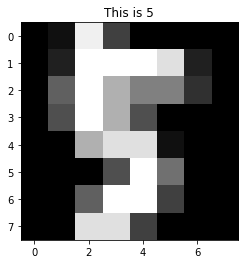

In [5]:
i = 46
plt.imshow(digits.images[i], cmap='gray')
plt.title('This is {}'.format(digits.target[i]))
plt.show()

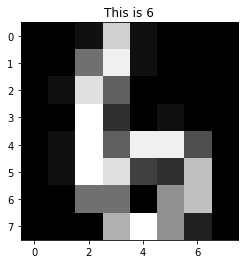

In [6]:
i = 728
plt.imshow(digits.images[i], cmap='gray')
plt.title('This is {}'.format(digits.target[i]))
plt.show()

# Ex 1

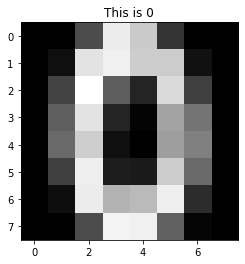

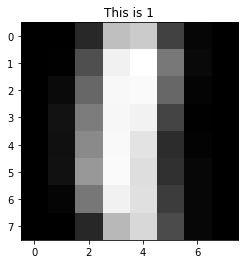

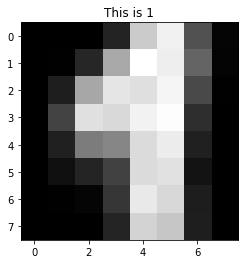

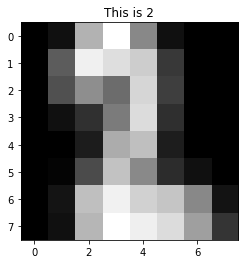

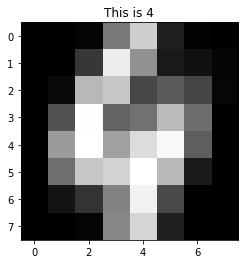

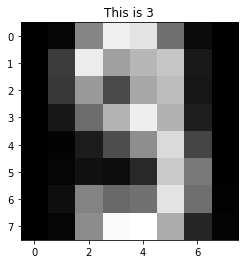

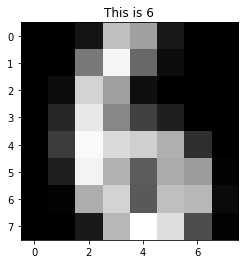

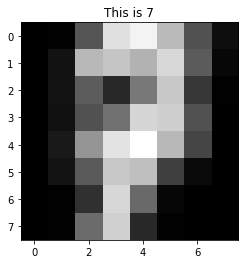

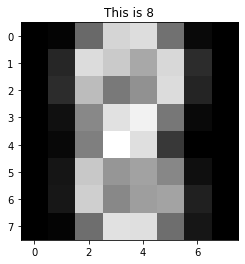

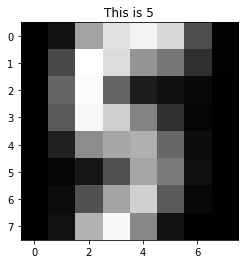

In [15]:
import numpy as np
data = np.reshape(np.ravel(digits.images),(digits.images.shape[0],-1))

def get_labels(pts, centroids):
    dist = np.hstack([np.linalg.norm(pts - i, axis = 1).reshape(-1,1) for i in centroids])
    return (np.argmin(dist, axis = 1))
    

def norm(labels, obs, centroids):
    n = 0
    for i in range(centroids.shape[0]):
        n += abs(np.linalg.norm(obs[i == labels] - centroids[i], axis = 1).sum())
    return n
    
def k_means(obs, k, iter=100, thresh=1e-05):
    centroids = obs[:k]
    labels = get_labels(obs, centroids)
    n = norm(labels, obs, centroids)
    new_centroids = centroids
    for i in range(iter):
        last_n = n;
        centroids = np.array([obs[t == labels].mean(axis = 0) for t in range(k)])
        labels = get_labels(obs, centroids)
        new_n = norm(labels, obs, centroids)
        if (new_n < n):
            new_centroids = centroids
            n = new_n
        if(abs(last_n - new_n) < thresh):
            break
    return new_centroids
k=10
centroids = k_means(data, k)
labels = get_labels(data, centroids)
targets_new = digits.target.copy()
for i in range(k):
    if i in labels:
        cluster = digits.target[labels == i]
        count = np.bincount(cluster)
        targets_new[labels == i] = np.argmax(count)
for i in range(k):
    if i in labels:
        plt.imshow(np.reshape(centroids[i],(8,8)), cmap='gray')
        plt.title('This is {}'.format(targets_new[labels == i][0]))
        plt.show()

# Ex 2

In [16]:
def error(k, labels):
    if i in labels:
        t = np.sum([np.count_nonzero(np.zeros(len(digits.target[labels == i]))+np.argmax(np.bincount(digits.target[labels == i])) - digits.target[labels == i]) for i in range(k)]) 
    return (t/1797)
error (k, labels)


0.20868113522537562

# Ex 3

[[177.   0.   1.   0.   0.   0.   1.   0.   0.   0.]
 [  0. 154.   4.   0.  10.   0.   3.   2.  16.  20.]
 [  0.  25. 148.   2.   0.   0.   0.   0.   3.   0.]
 [  0.   0.  12. 161.   0.  39.   0.   0.  13. 145.]
 [  1.   0.   0.   0. 161.   1.   0.   0.   0.   0.]
 [  0.   1.   0.   1.   0. 140.   0.   4.   3.   5.]
 [  0.   2.   0.   0.   0.   2. 176.   0.   1.   0.]
 [  0.   0.   2.   8.   8.   0.   0. 170.   3.   8.]
 [  0.   0.  10.  11.   2.   0.   1.   3. 135.   2.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]]


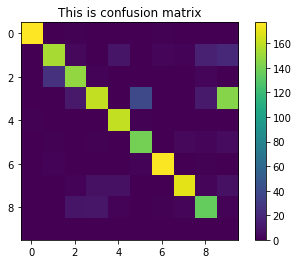

In [17]:
def conf(targets_new):
    confmat = np.zeros((10,10))
    for i in range(10):
        confmat[i] = np.bincount(digits.target[np.where(targets_new == i)], minlength = 10)
    return confmat
confmat = conf(targets_new)
print(confmat)
plt.imshow(confmat)
plt.title('This is confusion matrix')
plt.colorbar()
plt.show()

# Ex 4

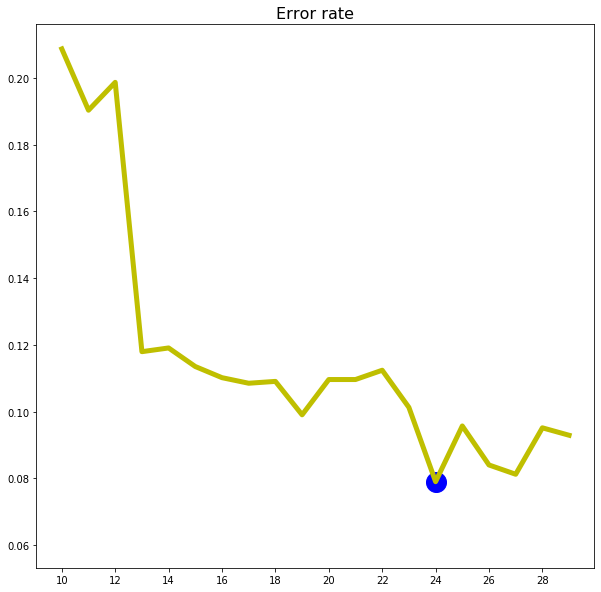

In [8]:
var = np.arange(30)[10:]
var = var.astype(int)
plt.figure(figsize=(10,10))
plt.xticks(np.arange(50)[2::2])
plt.yticks()
C = [error(x, get_labels(data,k_means(data,x))) for x in var]
plt.title('Error rate', fontsize=16)
plt.scatter(24, error(24, get_labels(data,k_means(data,24))), c = 'b', s =400)# Наименьшее К с довольно маленькой ошибкой (При K > 24 ошибка не намного меньше, а кластеров значительно больше)
plt.plot(var, C,color = 'y', lw = 5)
plt.show()

# Ex 5

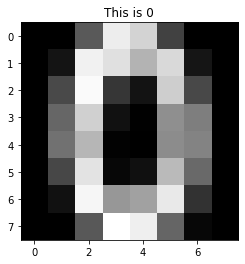

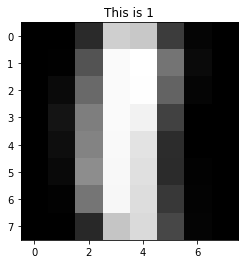

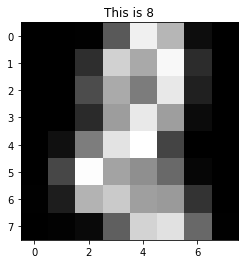

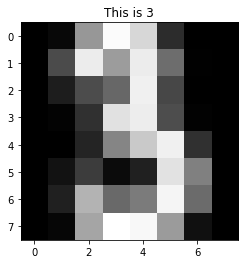

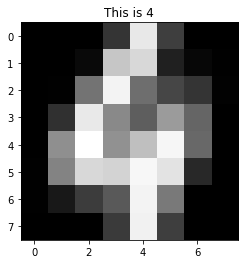

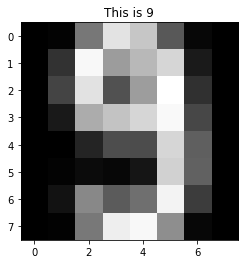

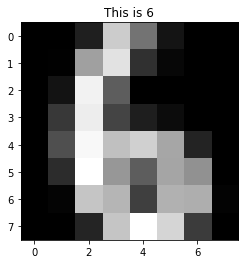

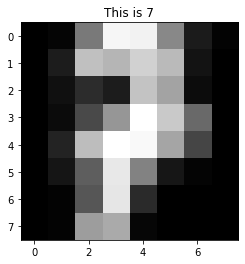

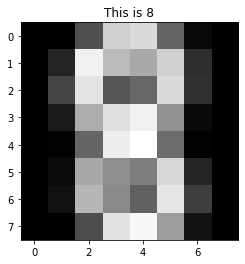

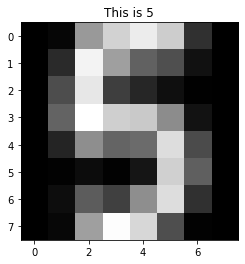

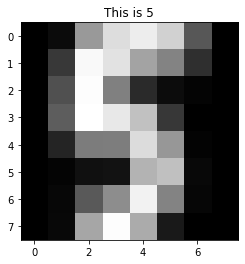

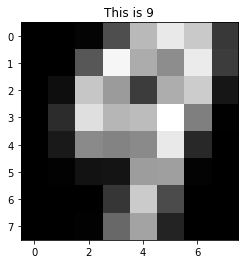

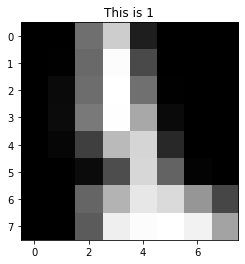

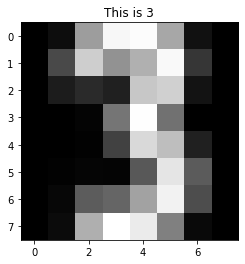

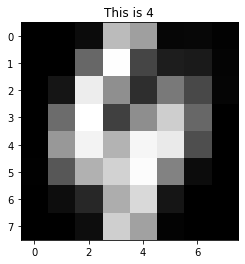

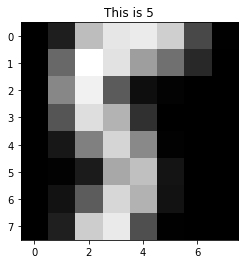

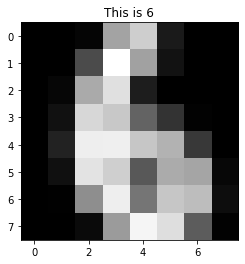

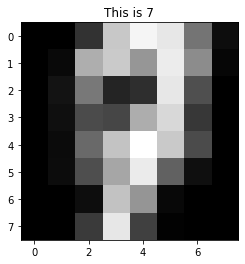

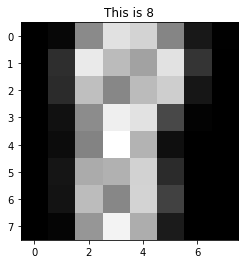

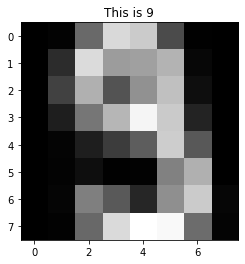

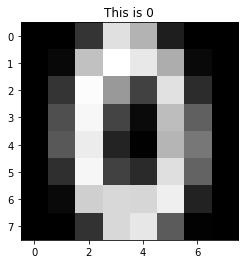

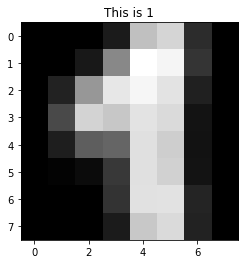

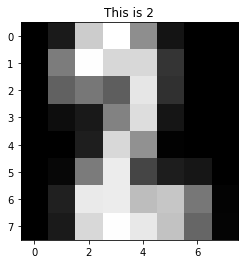

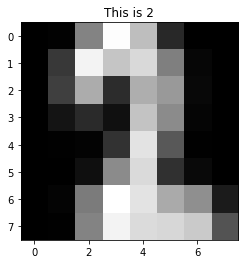

[2 3 2 2 2 3 2 2 3 3]
[[177.   0.   1.   0.   0.   0.   2.   0.   0.   0.]
 [  0. 175.   0.   0.   1.   0.   1.   0.  12.   2.]
 [  0.   0. 164.   1.   0.   0.   0.   0.   1.   0.]
 [  0.   0.   0. 141.   0.   0.   0.   0.   5.   2.]
 [  1.   0.   0.   0. 173.   1.   0.   0.   0.   0.]
 [  0.   1.   0.   2.   0. 170.   0.   0.   1.   2.]
 [  0.   0.   0.   0.   0.   1. 177.   0.   1.   0.]
 [  0.   0.   1.   3.   1.   0.   0. 164.   1.   8.]
 [  0.   6.  11.  13.   3.   1.   1.   3. 152.   4.]
 [  0.   0.   0.  23.   3.   9.   0.  12.   1. 162.]]


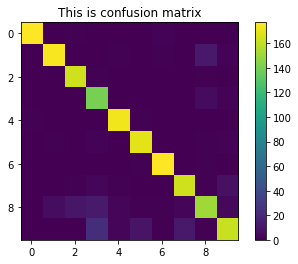

In [13]:
k = 24
centroids = k_means(data, k)
labels = get_labels(data, centroids)
targets_new = digits.target.copy()
for i in range(k):
    if i in labels:
        cluster = digits.target[labels == i]
        count = np.bincount(cluster)
        targets_new[labels == i] = np.argmax(count)
for i in range(k):
    if i in labels:
        plt.imshow(np.reshape(centroids[i],(8,8)), cmap='gray')
        plt.title('This is {}'.format(targets_new[labels == i][0]))
        plt.show()
        
print(np.bincount([targets_new[labels==i][0] for i in range(k)])) #Число кластеров для каждой цифры соответсвенно

confmat = conf(targets_new)
print(confmat)
plt.imshow(confmat)
plt.title('This is confusion matrix')
plt.colorbar()
plt.show()